Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.71      0.52        17
           1       0.67      0.37      0.48        27

    accuracy                           0.50        44
   macro avg       0.54      0.54      0.50        44
weighted avg       0.57      0.50      0.49        44

Accuracy: 0.50


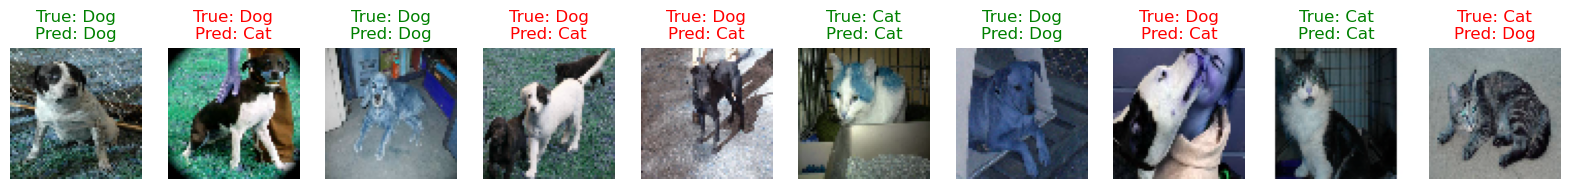

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Path to the dataset
DATASET_DIR = r"C:\Users\omcha\Machine learning\Task3\train"

# Function to load images from a folder
def load_images(dataset_dir, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(dataset_dir):
        if filename.endswith('.jpg'):  # Load only .jpg files
            filepath = os.path.join(dataset_dir, filename)
            try:
                img = cv2.imread(filepath)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img)
                    labels.append(label)
            except Exception as e:
                print(f"Error loading image {filepath}: {e}")
    return images, labels

# Load images from 'cats' and 'dogs' directories
cats_dir = os.path.join(DATASET_DIR, "cats")
dogs_dir = os.path.join(DATASET_DIR, "dogs")

# Validate dataset paths
if not os.path.exists(cats_dir) or not os.path.exists(dogs_dir):
    print("Error: Dataset directories not found!")
    exit()

# Load cat and dog images
cats_images, cats_labels = load_images(cats_dir, label=0)
dogs_images, dogs_labels = load_images(dogs_dir, label=1)

# Combine images and labels
all_images = np.array(cats_images + dogs_images, dtype=np.float32)
all_labels = np.array(cats_labels + dogs_labels)

# Flatten the images for SVM
flattened_images = all_images.reshape(len(all_images), -1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flattened_images, all_labels, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = svm.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualization Function
def visualize_predictions(X_test, y_test, y_pred, scaler, num_images=10, image_size=(64, 64)):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))
    indices = np.random.choice(len(X_test), size=num_images, replace=False)
    
    # Reverse scaling to get original pixel values
    X_test_original = scaler.inverse_transform(X_test)
    for i, idx in enumerate(indices):
        # Reshape back to image
        img = X_test_original[idx].reshape(image_size[0], image_size[1], 3).astype('uint8')
        axes[i].imshow(img)
        true_label = "Cat" if y_test[idx] == 0 else "Dog"
        pred_label = "Cat" if y_pred[idx] == 0 else "Dog"
        color = "green" if true_label == pred_label else "red"
        axes[i].set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        axes[i].axis('off')
    plt.show()

# Visualize predictions
visualize_predictions(X_test_scaled, y_test, y_pred, scaler)
